In [77]:
#/workspace/test.ipynb
import cv2
from __Detection.detection_api import DetectionAPI
from tools.visual_tools import show_detections
from tools.stream import StreamCCTV

In [78]:
det = DetectionAPI(thres=0.0)

Loads checkpoint by local backend from path: /workspace/PretrainedModel_by_JeonYT/vehicle/epoch_54.pth
Loads checkpoint by local backend from path: /workspace/PretrainedModel_by_JeonYT/worker/epoch_100.pth


In [79]:
cam = StreamCCTV(
                url="rtsp://210.99.70.120:1935/live/cctv001.stream",
                transport="tcp",
                max_width=1920
                ).start()
cam.wait_ready(2.0)

False

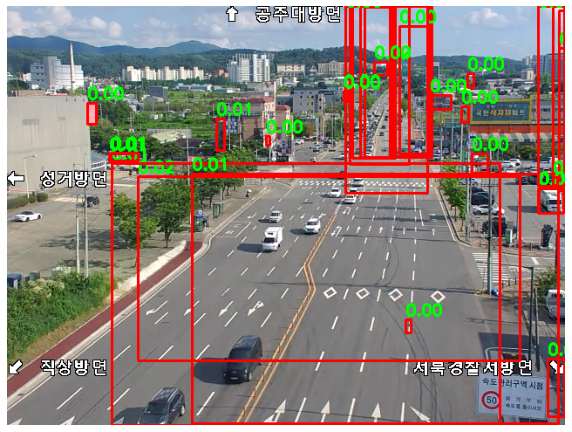

array([[[205, 187, 172],
        [205, 187, 172],
        [205, 187, 172],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[205, 187, 172],
        [205, 187, 172],
        [205, 187, 172],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[212, 187, 171],
        [212, 187, 171],
        [212, 187, 171],
        ...,
        [236, 219, 222],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[122, 123, 128],
        [120, 121, 126],
        [117, 120, 125],
        ...,
        [118, 109, 106],
        [126, 116, 116],
        [108,  98,  98]],

       [[133, 136, 141],
        [114, 117, 122],
        [105, 111, 115],
        ...,
        [122, 108, 106],
        [130, 116, 114],
        [112,  98,  96]],

       [[123, 126, 131],
        [120, 123, 128],
        [158, 164, 168],
        ...,
        [122, 108, 106],
        [130, 116, 114],
        [112,  98,  96]]

In [114]:
img= cam.shoot(wait=True, timeout=2.0)
if img is not None:
    result = det.detect(img)
else:
    img= cam.shoot(wait=True, timeout=2.0)

show_detections(
    image_or_path=img, 
    detections_result=result, 
    score_thr=0.0, 
    save_path=None
    )

In [115]:
cam.stop()